In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('data/title_budgets_ratings_v2.csv', index_col = 0)

In [4]:
df = df.rename(columns = {'profit':'profit_multiple'})

In [5]:
df.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841
4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114


In [6]:
df.shape

(2943, 18)

In [7]:
df.isna().sum()

id                       0
release_date             0
movie                    0
tconst                   0
primary_title            0
original_title           0
start_year               0
runtime_minutes        121
genres                   8
averagerating            0
numvotes                 0
year                     0
month                    0
production_budget_2      0
domestic_gross_2         0
worldwide_gross_2        0
genres2                  8
profit_multiple          0
dtype: int64

We won't drop columns that have NaNs in runtime_minutes because some big productions, such as Titanic, does not have a value either! 

In [8]:
df.loc[df['movie']== 'Titanic']

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
32,43,1997-12-19,Titanic,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,1997,12,200000000,659363944,2208208395,['Adventure'],10.041042


Is profit correlated with reviews? Scatter plot of average rating and profit (box office - budget)/budget. This analysis will help guide us to go after good revi
Steps:
- drop the 282 productions where worldwide gross revenue is zero.
- drop the 7 productions where profit multiple is so high it doens't make sense (choose 30 as cutoff). Dropped 43 movies.
- This leaves us with 2618 movies for analysis. 
- make the scatterplot

In [9]:
df[df['worldwide_gross_2'] == 0]

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
318,80,2017-12-13,Bright,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",6.4,147834,2017,12,90000000,0,0,"['Action', 'Crime', 'Fantasy']",-1.0
519,52,2015-12-11,The Ridiculous 6,tt2479478,The Ridiculous 6,The Ridiculous 6,2015,119.0,"Comedy,Western",4.8,38694,2015,12,60000000,0,0,"['Comedy', 'Western']",-1.0
520,53,2019-11-08,Midway,tt2428672,Midway,Midway,2013,85.0,"Documentary,Family",7.3,43,2019,11,59500000,0,0,"['Documentary', 'Family']",-1.0
1035,30,2019-09-30,Unhinged,tt5940342,Unhinged,Unhinged,2017,93.0,Horror,4.2,512,2019,9,29000000,0,0,['Horror'],-1.0
1094,56,2015-04-24,The Face of an Angel,tt2967008,The Face of an Angel,The Face of an Angel,2014,101.0,"Crime,Drama",4.6,4211,2015,4,26000000,0,0,"['Crime', 'Drama']",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,56,2013-01-04,All Superheroes Must Die,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,78.0,"Sci-Fi,Thriller",4.0,1977,2013,1,20000,0,0,"['Sci-Fi', 'Thriller']",-1.0
2937,59,2011-11-25,The Ridges,tt1781935,The Ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller",2.9,127,2011,11,17300,0,0,"['Drama', 'Horror', 'Thriller']",-1.0
2938,62,2014-12-31,Stories of Our Lives,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,7.5,85,2014,12,15000,0,0,['Drama'],-1.0
2941,78,2018-12-31,Red 11,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43,2018,12,7000,0,0,"['Horror', 'Sci-Fi', 'Thriller']",-1.0


In [10]:
df = df[df['worldwide_gross_2']!=0]

In [11]:
df[df['profit_multiple']>30].shape

(43, 18)

In [12]:
df = df[df['profit_multiple']<= 30]

In [13]:
df.shape

(2618, 18)

In [14]:
# df[df['year'] >= 2015].shape

In [15]:
# df = df[df['year'] >= 2015]

In [16]:
# df[df['start_year'] != df['year']]

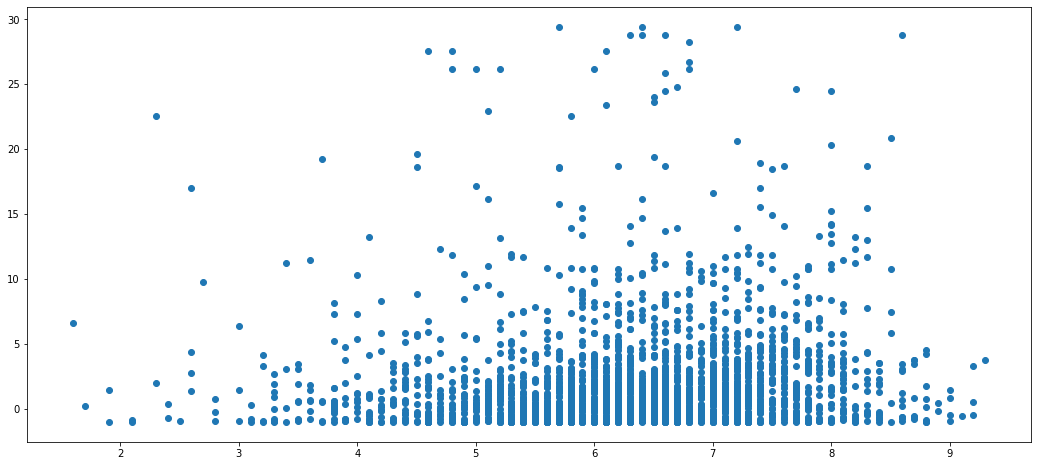

In [18]:
plt.figure(figsize = (18,8))
plt.scatter(df['averagerating'], df['profit_multiple'])
plt.show()

Revenue & profitability analysis by genre. 
Steps:
- Drop the 8 movies where genres are NaN. 
- This leaves us with 2610 movies for analysis. 
- Calculate the average revenue and profit multipe for all 22 genres represented. 

In [19]:
df['genres3'] = list(df['genres'].str.split(','))

In [20]:
df.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple,genres3
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577,[Horror]
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673,"[Action, Adventure, Fantasy]"
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108,"[Action, Adventure, Sci-Fi]"
3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841,"[Action, Adventure, Sci-Fi]"
4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114,"[Action, Adventure, Sci-Fi]"


In [21]:
type(df['genres3'].iloc[0])

list

In [22]:
df['genres2'].iloc[0]

"['Horror']"

In [23]:
df['genres3'].iloc[0]

['Horror']

In [24]:
len((df['genres3'].iloc[0]))

1

In [25]:
len(range(len(df)))

2618

In [26]:
df = df.dropna(subset = ['genres3'])

In [30]:
df.shape

(2610, 19)

In [37]:
def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    budget_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
            budget_list.append(df['production_budget_2'].iloc[i])
    avg_revenue = round(sum(revenue_list)/len(revenue_list),2)
    avg_profit = round(sum(profit_list)/len(profit_list),2)
    avg_budget = round(sum(budget_list)/len(budget_list),2)
    return avg_revenue, avg_profit, avg_budget, genre

In [38]:
avg_revenue, avg_profit, avg_budget, genre = get_genres(df, 'Action')

In [39]:
test = list(get_genres(df,'Action'))

In [40]:
test

[203026877.28, 1.8, 69723282.57, 'Action']

In [41]:
#get a list of unique genres
genres_unique =[]
for i in range(len(df)):
    for n in range(len(df['genres3'].iloc[i])):
        if df['genres3'].iloc[i][n] not in genres_unique:
            genres_unique.append(df['genres3'].iloc[i][n])
genres_unique

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Musical',
 'Romance',
 'Mystery',
 'Documentary',
 'Biography',
 'History',
 'Sport',
 'War',
 'Music',
 'News']

In [42]:
len(genres_unique)

22

Creating a dataframe of genres and their average revenue & profit multiple: 

In [43]:
genres_list = []
for i in genres_unique:
    genres_list.append(list(get_genres(df,i)))
genres_list 

[[74143870.44, 3.95, 21836018.4, 'Horror'],
 [203026877.28, 1.8, 69723282.57, 'Action'],
 [312194676.06, 2.06, 95346204.84, 'Adventure'],
 [225326975.11, 2.49, 73848502.99, 'Fantasy'],
 [269044486.1, 2.3, 76636590.23, 'Sci-Fi'],
 [91504158.47, 2.52, 31829879.71, 'Thriller'],
 [93819496.36, 0.52, 50414285.71, 'Western'],
 [328168941.84, 2.52, 89474218.75, 'Animation'],
 [115135663.26, 2.18, 36458739.8, 'Comedy'],
 [173426814.37, 2.04, 56369548.87, 'Family'],
 [73456701.35, 1.21, 30112662.72, 'Crime'],
 [66294453.44, 1.93, 25555166.77, 'Drama'],
 [206825726.24, 2.78, 43864285.71, 'Musical'],
 [67516437.14, 2.49, 21933430.42, 'Romance'],
 [76470519.22, 3.51, 24853273.31, 'Mystery'],
 [63574867.25, 1.53, 25081783.92, 'Documentary'],
 [72681285.04, 1.8, 26305981.37, 'Biography'],
 [76466399.08, 1.01, 32180281.69, 'History'],
 [76974535.71, 0.95, 26540000.0, 'Sport'],
 [42588233.05, 0.46, 23423076.92, 'War'],
 [68044494.57, 2.67, 15459729.73, 'Music'],
 [36682077.0, 0.95, 16600000.0, 'News']

In [44]:
df_genre = pd.DataFrame(genres_list, columns=['revenue', 'profit', 'budget', 'genre'])

In [45]:
df_genre

,revenue,profit,budget,genre
0,7.414387e+07,3.95,21836018.40,Horror
1,2.030269e+08,1.80,69723282.57,Action
2,3.121947e+08,2.06,95346204.84,Adventure
3,2.253270e+08,2.49,73848502.99,Fantasy
4,2.690445e+08,2.30,76636590.23,Sci-Fi
5,9.150416e+07,2.52,31829879.71,Thriller
6,9.381950e+07,0.52,50414285.71,Western
7,3.281689e+08,2.52,89474218.75,Animation
8,1.151357e+08,2.18,36458739.80,Comedy
9,1.734268e+08,2.04,56369548.87,Family


In [46]:
df_genre_rev = df_genre.sort_values(by=['revenue'], ascending = False)

In [47]:
df_genre_rev

,revenue,profit,budget,genre
7,3.281689e+08,2.52,89474218.75,Animation
2,3.121947e+08,2.06,95346204.84,Adventure
4,2.690445e+08,2.30,76636590.23,Sci-Fi
3,2.253270e+08,2.49,73848502.99,Fantasy
12,2.068257e+08,2.78,43864285.71,Musical
1,2.030269e+08,1.80,69723282.57,Action
9,1.734268e+08,2.04,56369548.87,Family
8,1.151357e+08,2.18,36458739.80,Comedy
6,9.381950e+07,0.52,50414285.71,Western
5,9.150416e+07,2.52,31829879.71,Thriller


In [48]:
df_genre_profit = df_genre.sort_values(by=['profit'], ascending = False)

In [49]:
df_genre_budget = df_genre.sort_values(by=['budget'], ascending = False)

<BarContainer object of 22 artists>

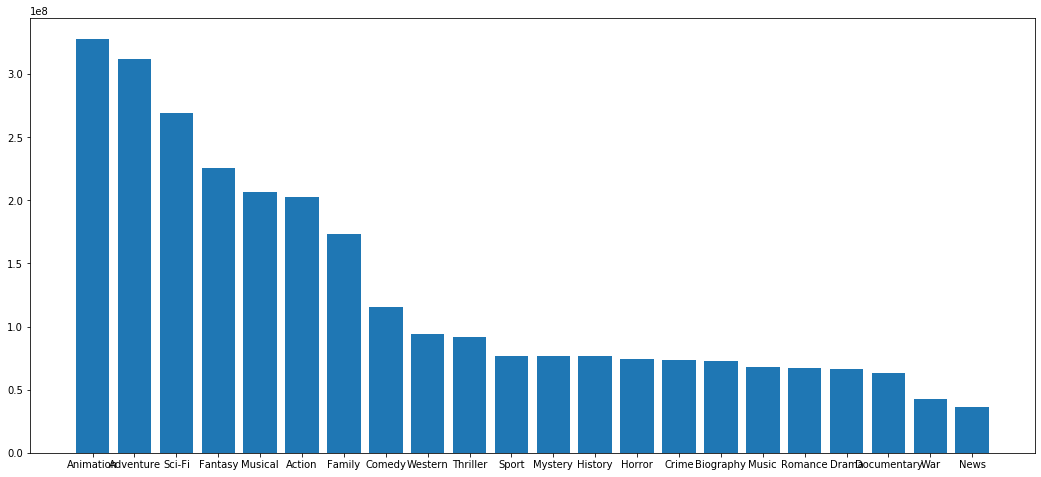

In [50]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_rev['genre'],df_genre_rev['revenue'])

<BarContainer object of 22 artists>

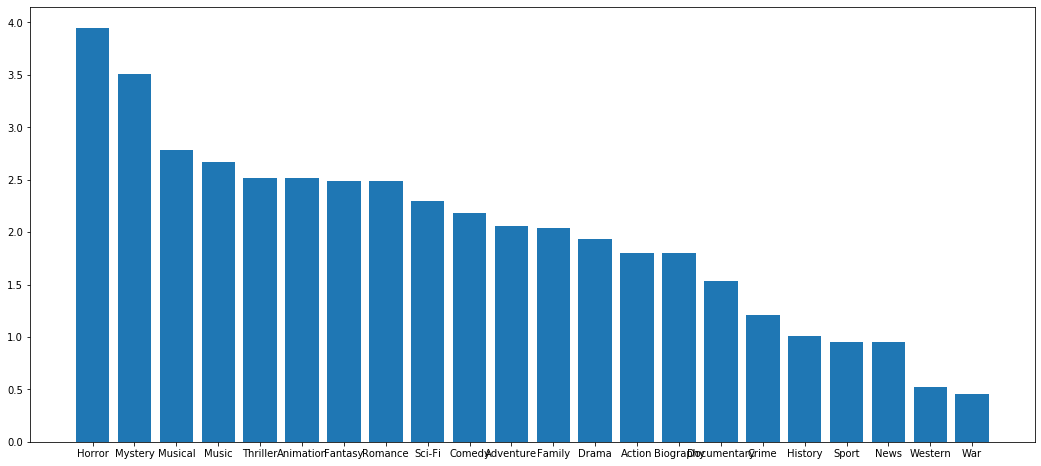

In [51]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_profit['genre'],df_genre_profit['profit'])

<BarContainer object of 22 artists>

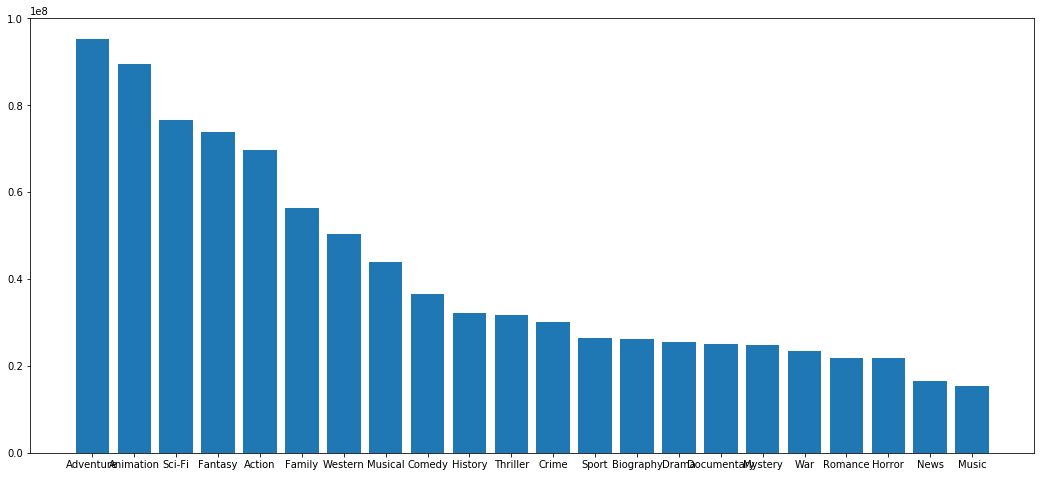

In [52]:
plt.figure(figsize = (18,8))
plt.bar(df_genre_budget['genre'],df_genre_budget['budget'])

Now we dig into the top 3 profitable genres and see their profitability trends over years:
- we explode genres3, with list entries, into multiple rows of single genre. This brought df from 2610 to 5930 rows.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2940
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2610 non-null   int64  
 1   release_date         2610 non-null   object 
 2   movie                2610 non-null   object 
 3   tconst               2610 non-null   object 
 4   primary_title        2610 non-null   object 
 5   original_title       2610 non-null   object 
 6   start_year           2610 non-null   int64  
 7   runtime_minutes      2505 non-null   float64
 8   genres               2610 non-null   object 
 9   averagerating        2610 non-null   float64
 10  numvotes             2610 non-null   int64  
 11  year                 2610 non-null   int64  
 12  month                2610 non-null   int64  
 13  production_budget_2  2610 non-null   int64  
 14  domestic_gross_2     2610 non-null   int64  
 15  worldwide_gross_2    2610 non-null   i

In [55]:
df.shape

(2610, 19)

In [59]:
df2 = df.explode('genres3')

In [60]:
df2.shape

(5930, 19)

In [61]:
df2.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple,genres3
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673,Action
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673,Adventure
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673,Fantasy
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108,Action


In [109]:
df3 = df2.groupby(['genres3','start_year'])['profit_multiple'].mean()

In [113]:
df4 = df2.groupby(['genres3','start_year'])['movie'].count()

In [111]:
df3.Horror

start_year
2010    1.441392
2011    2.197294
2012    5.159515
2013    6.060797
2014    3.187710
2015    3.513816
2016    4.229782
2017    4.010868
2018    6.152807
2019    4.895214
Name: profit_multiple, dtype: float64

In [99]:
df3.Horror.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='start_year')

In [114]:
df4.Horror

start_year
2010    30
2011    38
2012    30
2013    30
2014    28
2015    36
2016    33
2017    31
2018    27
2019     9
Name: movie, dtype: int64

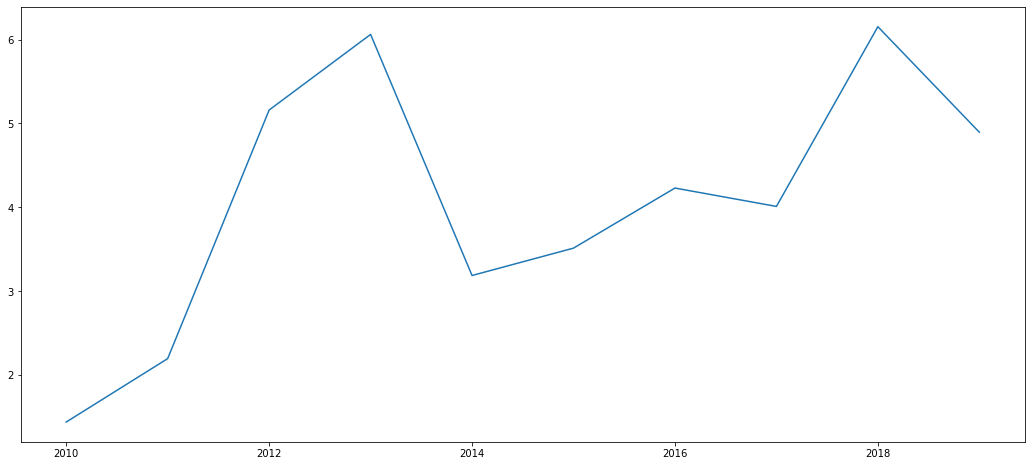

In [104]:
plt.figure(figsize = (18,8))
plt.plot(df3.Horror)

In [116]:
df4.Mystery

start_year
2010    16
2011    24
2012    21
2013    21
2014    27
2015    31
2016    17
2017    16
2018    13
2019     8
Name: movie, dtype: int64

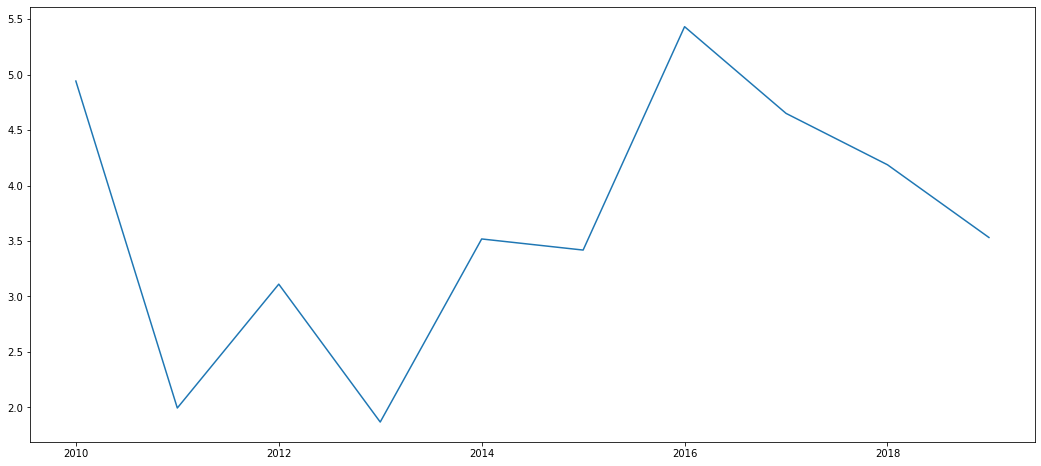

In [105]:
plt.figure(figsize = (18,8))
plt.plot(df3.Mystery)

In [115]:
df4.Musical

start_year
2010    4
2011    3
2012    3
2013    3
2014    2
2017    6
Name: movie, dtype: int64

In [117]:
df3

genres3  start_year
Action   2010          1.483806
         2011          2.299466
         2012          1.849022
         2013          1.349947
         2014          2.334794
                         ...   
Western  2014         -0.096994
         2015         -0.849146
         2016          0.805835
         2018         -0.947879
         2019          0.072129
Name: profit_multiple, Length: 205, dtype: float64

In [120]:
df5 = df3[df3['index']!='Horror']

KeyError: 'index'

In [135]:
df3 = df2.groupby(['genres3','start_year'])['profit_multiple','worldwide_gross_2'].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [137]:
df3

profit_multiple  worldwide_gross_2
genres3 start_year                                    
Action  2010               1.483806       1.437337e+08
        2011               2.299466       1.706514e+08
        2012               1.849022       1.987019e+08
        2013               1.349947       1.880455e+08
        2014               2.334794       2.173183e+08
...                             ...                ...
Western 2014              -0.096994       3.168527e+07
        2015              -0.849146       3.771345e+06
        2016               0.805835       1.625252e+08
        2018              -0.947879       1.563620e+05
        2019               0.072129       6.968838e+07

[205 rows x 2 columns]

In [138]:
df3.index

MultiIndex([( 'Action', 2010),
            ( 'Action', 2011),
            ( 'Action', 2012),
            ( 'Action', 2013),
            ( 'Action', 2014),
            ( 'Action', 2015),
            ( 'Action', 2016),
            ( 'Action', 2017),
            ( 'Action', 2018),
            ( 'Action', 2019),
            ...
            (    'War', 2019),
            ('Western', 2010),
            ('Western', 2011),
            ('Western', 2012),
            ('Western', 2013),
            ('Western', 2014),
            ('Western', 2015),
            ('Western', 2016),
            ('Western', 2018),
            ('Western', 2019)],
           names=['genres3', 'start_year'], length=205)

In [139]:
df3.Horror

AttributeError: 'DataFrame' object has no attribute 'Horror'

In [141]:
df4 = df3.reset_index(level=['start_year'])
df4

,start_year,profit_multiple,worldwide_gross_2
genres3,,,
Action,2010,1.483806,1.437337e+08
Action,2011,2.299466,1.706514e+08
Action,2012,1.849022,1.987019e+08
Action,2013,1.349947,1.880455e+08
Action,2014,2.334794,2.173183e+08
...,...,...,...
Western,2014,-0.096994,3.168527e+07
Western,2015,-0.849146,3.771345e+06
Western,2016,0.805835,1.625252e+08


In [142]:
df4[df4['genres3'] != 'Horror']

KeyError: 'genres3'

In [143]:
df4.Horror

AttributeError: 'DataFrame' object has no attribute 'Horror'

In [144]:
df5 = df2.groupby(['genres3','start_year'])['profit_multiple'].mean()

In [145]:
df5.Horror

start_year
2010    1.441392
2011    2.197294
2012    5.159515
2013    6.060797
2014    3.187710
2015    3.513816
2016    4.229782
2017    4.010868
2018    6.152807
2019    4.895214
Name: profit_multiple, dtype: float64

In [134]:
df4.groupby(['start_year']).mean()

,profit_multiple
start_year,
2010,1.978667
2011,1.331903
2012,2.180536
2013,1.966489
2014,1.838145
2015,1.619567
2016,2.326479
2017,2.839317
2018,2.714217


In [128]:
df5

,start_year,profit_multiple
genres3,,
Action,2010,1.483806
Action,2011,2.299466
Action,2012,1.849022
Action,2013,1.349947
Action,2014,2.334794
...,...,...
Western,2014,-0.096994
Western,2015,-0.849146
Western,2016,0.805835


In [130]:
df5[df5.index != 'Horror']

,start_year,profit_multiple
genres3,,
Action,2010,1.483806
Action,2011,2.299466
Action,2012,1.849022
Action,2013,1.349947
Action,2014,2.334794
...,...,...
Western,2014,-0.096994
Western,2015,-0.849146
Western,2016,0.805835
